###import libirares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

###loading data set

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [3]:
#!/bin/bash
!kaggle datasets download kaggle/sf-salaries

Dataset URL: https://www.kaggle.com/datasets/kaggle/sf-salaries
License(s): CC0-1.0
sf-salaries.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/sf-salaries.zip

Archive:  /content/sf-salaries.zip
replace Salaries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salaries.csv            
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         


In [5]:
df=pd.read_csv('/content/Salaries.csv')

<ipython-input-5-94e9c7e3cccf>:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Salaries.csv')


###EDA

In [6]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


there are columns data types should be converted to probr data typed

In [8]:
df.shape

(148654, 13)

In [9]:
df.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0


##what i will do cleaning

  - [X] modify data types
  - [X] handling null values
  - [ ] check for outlaiers

In [10]:
#modifyng data types
coluns=["BasePay", "OvertimePay", "OtherPay"  ,"Benefits"]
for col in coluns:
  df[col]=pd.to_numeric(df[col],errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


##handling null values

In [12]:
df.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


drop notes and statues because they are not valuble

In [13]:
df.drop(['Notes','Status'],axis=1,inplace=True)

drop nulls in basepay because they are 609 not afect the data set

In [14]:
df.dropna(subset=['BasePay'],inplace=True)

check for if TotalPayBenefits = TotalPay +Benefits

In [15]:
(df['TotalPayBenefits'] == (df['TotalPay'] + (df['Benefits'].fillna(0)))).value_counts()


,count
True,124742
False,23303


this shows that our asumption is true but investigate in  the false values why

In [16]:
df[(df['TotalPayBenefits']) != (df['TotalPay'] + df['Benefits'].fillna(0))]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36167,36168,John Goldberg,Captain 3,104404.00,0.00,245999.41,24287.23,350403.41,374690.64,2012,San Francisco
36169,36170,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2012,San Francisco
36171,36172,Rudy Castellanos,"Battlion Chief, Fire Suppressi",176771.74,124413.13,15803.39,52320.90,316988.26,369309.16,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148582,148583,Eva M Crummett,Recreation Leader,51.60,0.00,0.00,0.52,51.60,52.12,2014,San Francisco
148596,148597,Rowena T Ignacio,Registered Nurse,0.00,0.00,33.55,6.91,33.55,40.46,2014,San Francisco
148600,148601,Kim L Evans,Recreation Leader,37.23,0.00,0.00,0.37,37.23,37.60,2014,San Francisco
148601,148602,Brieanna Mcfadden,Recreation Leader,34.88,0.00,0.00,0.35,34.88,35.23,2014,San Francisco


after seeing the data its support our assumption because also the false condition achive that TotalPayBenefits = TotalPay +Benefits

filling nulls in benfites with TotalPayBenefits = TotalPay +Benefits

In [17]:
df['Benefits'] = df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'])

In [18]:
df.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,0
OvertimePay,0
OtherPay,0
Benefits,0
TotalPay,0
TotalPayBenefits,0
Year,0


In [19]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


###check for outlayers

In [20]:
ncols=['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']
for col in ncols:
  print(col)
  print(df[col].describe())

BasePay
count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64
OvertimePay
count    148045.000000
mean       5086.740800
std       11473.181557
min          -0.010000
25%           0.000000
50%           0.000000
75%        4695.710000
max      245131.880000
Name: OvertimePay, dtype: float64
OtherPay
count    148045.000000
mean       3645.661408
std        8019.498636
min       -7058.590000
25%           0.000000
50%         817.170000
75%        4242.900000
max      400184.250000
Name: OtherPay, dtype: float64
Benefits
count    148045.000000
mean      18980.334019
std       17176.391332
min         -13.800000
25%           0.000000
50%       23468.340000
75%       33507.310000
max       96570.660000
Name: Benefits, dtype: float64
TotalPay
count    148045.000000
mean      75057.851048
std       50409.761170
min        -618.130000

it seem all has outlayers

notic negative values in base pay

In [21]:
#removing negative values
df = df[df['BasePay'] >= 0]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148034 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148034 non-null  int64  
 1   EmployeeName      148034 non-null  object 
 2   JobTitle          148034 non-null  object 
 3   BasePay           148034 non-null  float64
 4   OvertimePay       148034 non-null  float64
 5   OtherPay          148034 non-null  float64
 6   Benefits          148034 non-null  float64
 7   TotalPay          148034 non-null  float64
 8   TotalPayBenefits  148034 non-null  float64
 9   Year              148034 non-null  int64  
 10  Agency            148034 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


29609 people take more than the 80%

box plot all numerc columns to check out laiers

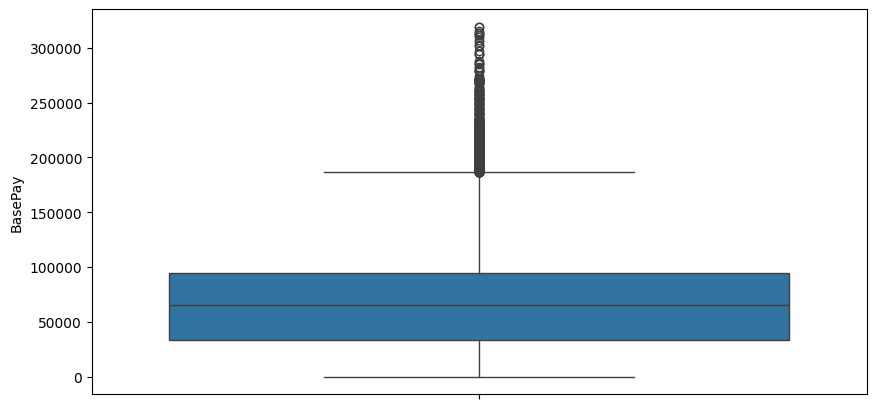

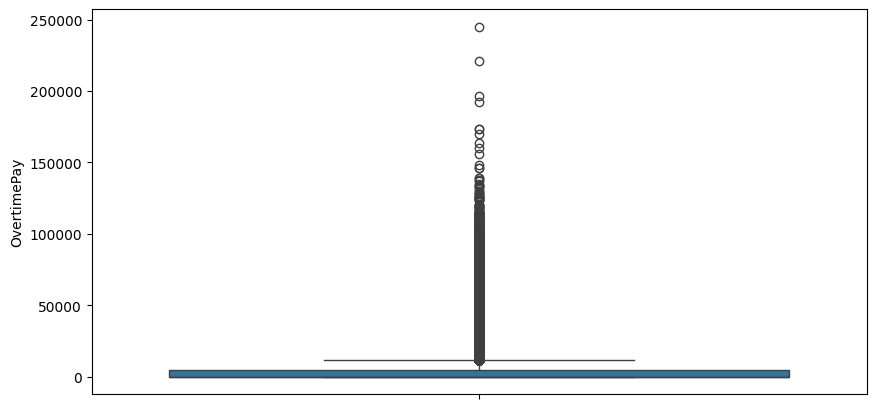

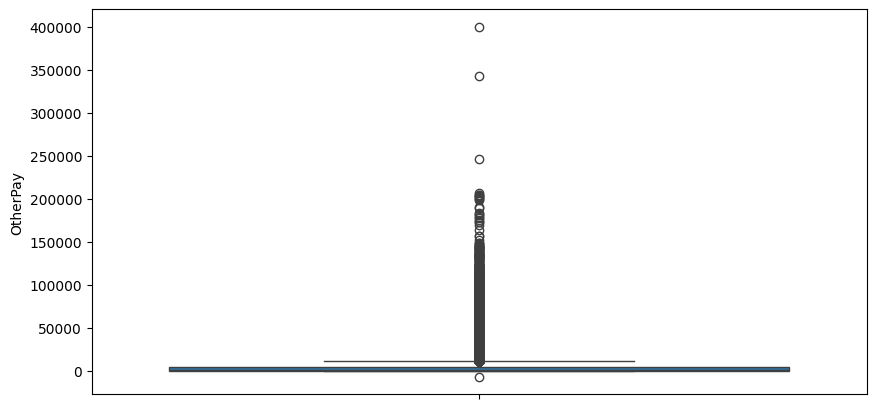

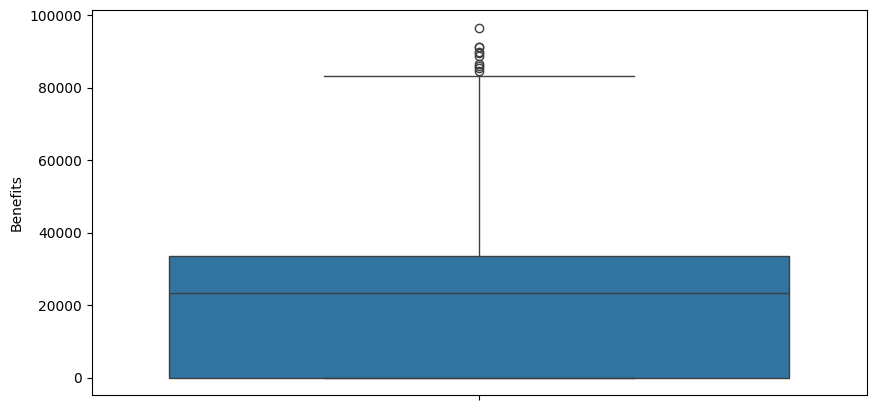

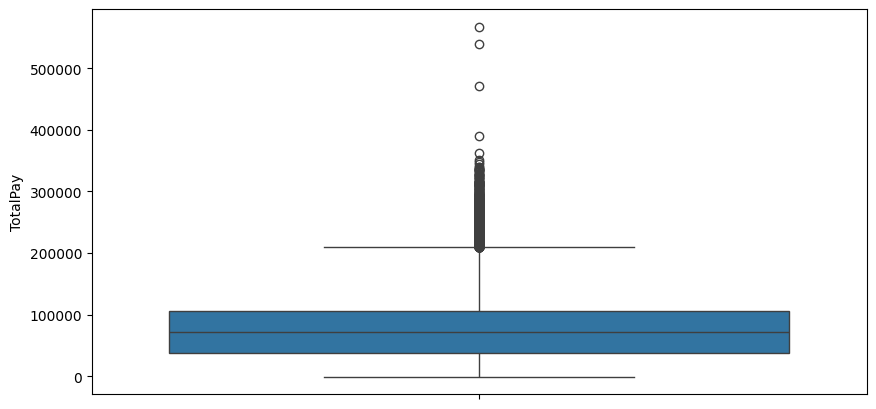

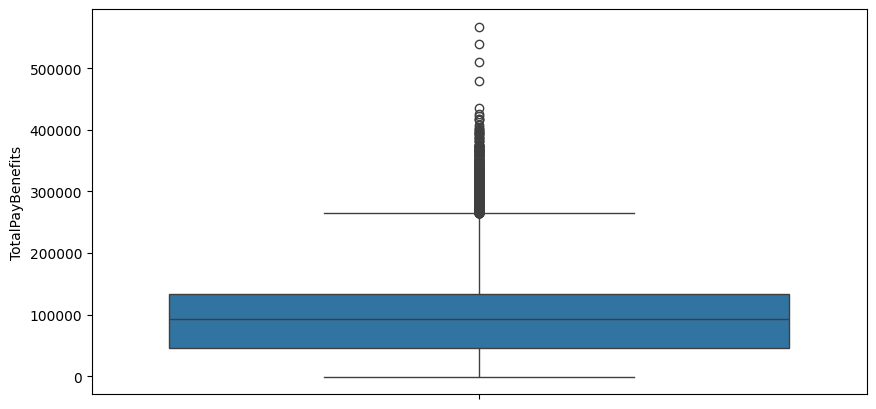

In [23]:
for col in ncols:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  #sns.stripplot(df[col])
  plt.show()


In [24]:
z_scores = stats.zscore(df[ncols])

# Convert Z-scores to a DataFrame for easier filtering
z_scores_df = pd.DataFrame(z_scores, columns=ncols)

# Keep rows where all specified column Z-scores are below the threshold (e.g., 3)
df_clean = df[(stats.zscore(df[ncols]).abs() < 3).all(axis=1)]

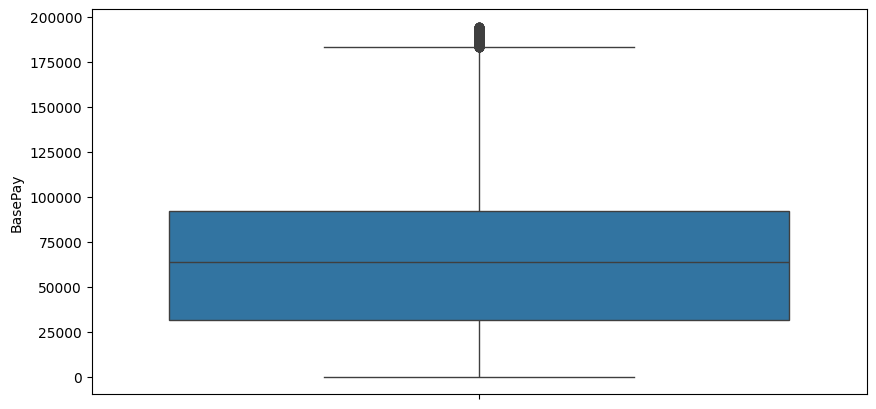

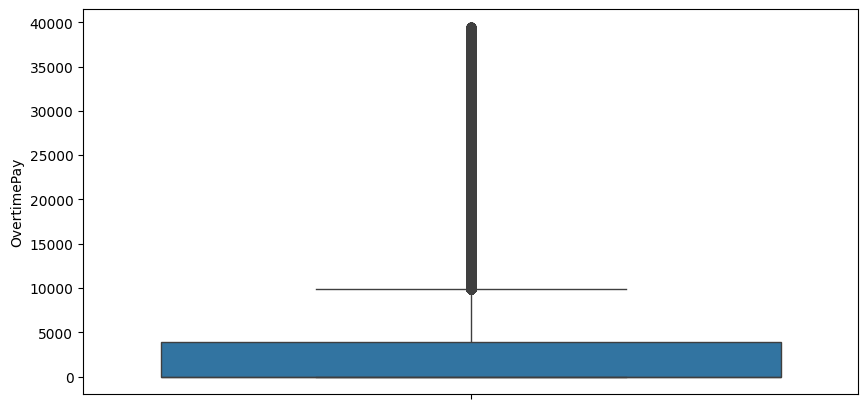

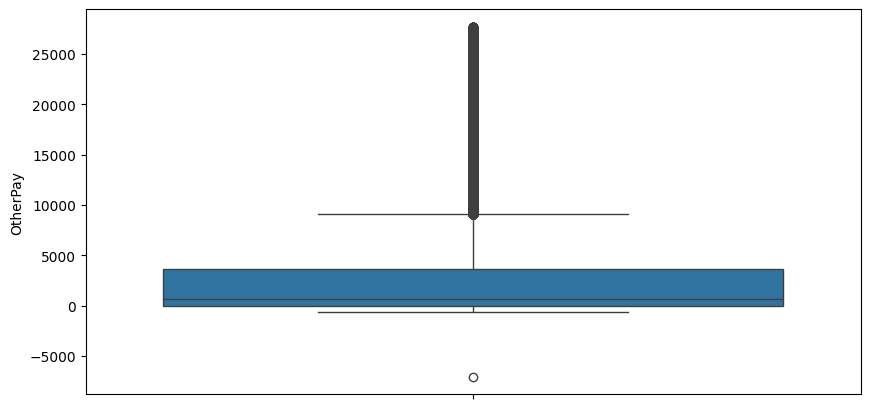

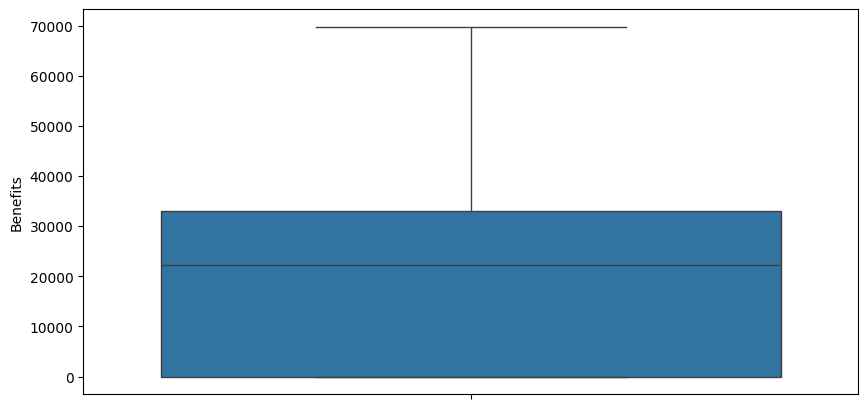

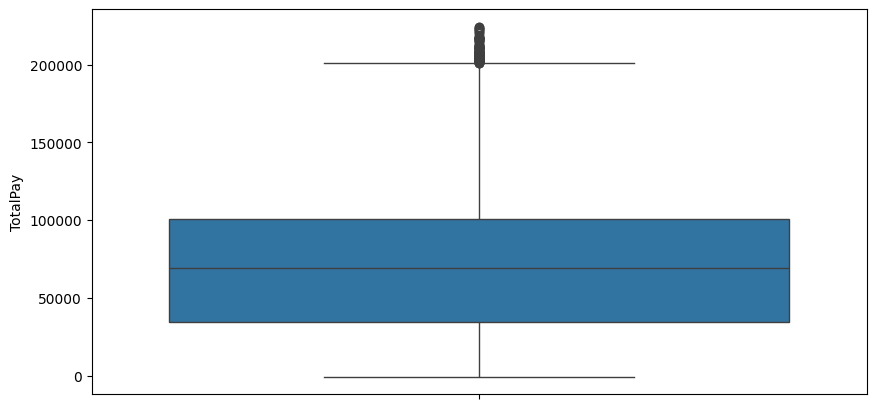

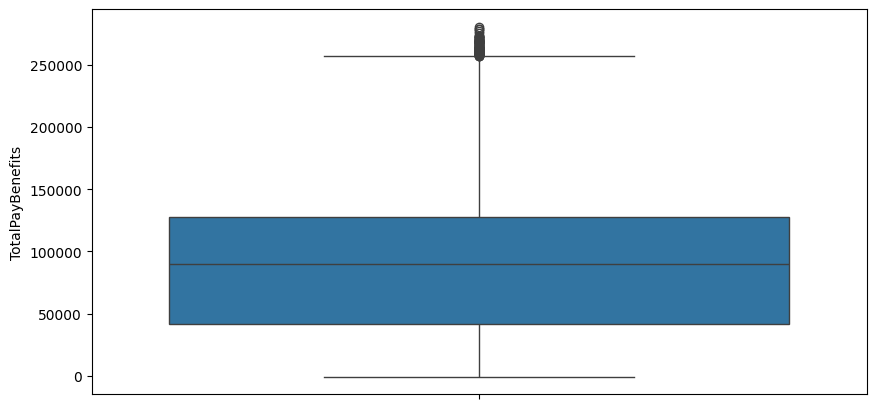

In [25]:
for col in ncols:
  plt.figure(figsize=(10,5))
  sns.boxplot(df_clean[col])
  #sns.stripplot(df_clean[col])
  plt.show()


In [26]:
df_clean.shape

(142179, 11)

handle outliers in basepay

```
# This is formatted as code
```



In [27]:
df_clean[df_clean['BasePay']>df_clean['BasePay'].quantile(0.99)].shape

(1420, 11)

In [28]:
df_clean=df_clean[df_clean['BasePay']<df_clean['BasePay'].quantile(0.99)]

<Axes: ylabel='BasePay'>

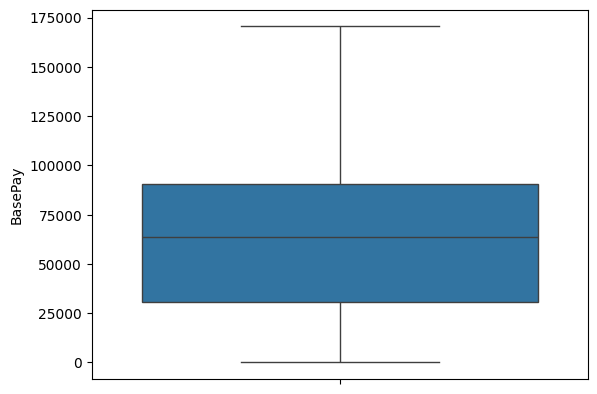

In [29]:
sns.boxplot(df_clean['BasePay'])

handle outliers in TotalPay


In [30]:
df_clean[df_clean['TotalPay']>df_clean['TotalPay'].quantile(0.99)].shape

(1408, 11)

In [31]:
df_clean=df_clean[df_clean['TotalPay']<df_clean['TotalPay'].quantile(0.99)]

<Axes: ylabel='TotalPay'>

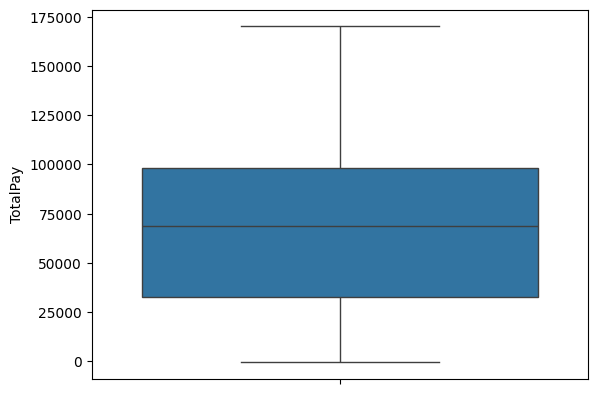

In [32]:
sns.boxplot(df_clean['TotalPay'])

handle outliers in TotalPay

In [33]:
df_clean[df_clean['TotalPayBenefits']>df_clean['TotalPayBenefits'].quantile(0.99)].shape

(1394, 11)

In [34]:
df_clean=df_clean[df_clean['TotalPayBenefits']<df_clean['TotalPayBenefits'].quantile(0.99)]

<Axes: ylabel='TotalPayBenefits'>

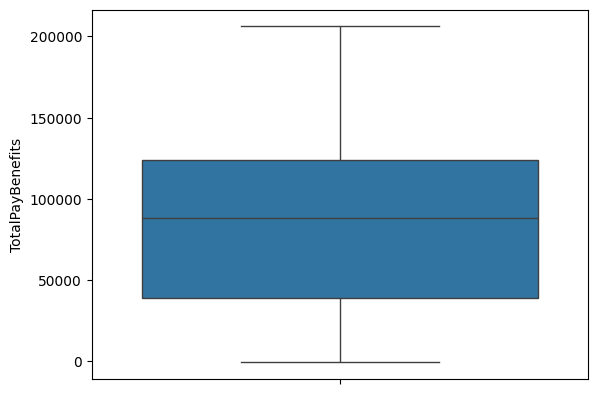

In [35]:
sns.boxplot(df_clean['TotalPayBenefits'])

###Doing som EDA

In [36]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148034.000000,148034.000000,148034.000000,148034.000000,148034.000000,148034.000000,148034.000000,148034.000000
mean,74192.777112,66330.383796,5087.109033,3645.932307,18981.744115,75063.425136,94045.169251,2012.520691
std,42950.079107,42762.392041,11473.528281,8019.735008,17176.250496,50407.486340,62680.570137,1.119422
min,1.000000,0.000000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2011.000000
25%,37009.250000,33599.432500,0.000000,0.000000,0.000000,36980.992500,45097.250000,2012.000000
50%,74028.500000,65010.265000,0.000000,817.435000,23471.440000,71648.415000,92680.350000,2013.000000
75%,111641.750000,94691.057500,4696.352500,4243.190000,33508.237500,106028.542500,133091.185000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


top paid jobs

In [37]:
df.groupby('JobTitle')['TotalPay'].max().sort_values(ascending=False).head(10)

,TotalPay
JobTitle,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
CAPTAIN III (POLICE DEPARTMENT),538909.28
Deputy Chief 3,471952.64
Asst Med Examiner,390111.98
"Lieutenant, Fire Suppression",362844.66
Captain 3,350403.41
"Battalion Chief, Fire Suppress",347102.32
Chief Investment Officer,339653.70
Chief of Police,339282.07


top paid persons

In [38]:
df.groupby('EmployeeName')['TotalPay'].max().sort_values(ascending=False).head(10)

,TotalPay
EmployeeName,
NATHANIEL FORD,567595.43
GARY JIMENEZ,538909.28
David Shinn,471952.64
Amy P Hart,390111.98
Gary Altenberg,362844.66
John Goldberg,350403.41
Samson Lai,347102.32
Ellen G Moffatt,344187.46
William J Coaker Jr.,339653.70


In [39]:
df.sort_values(by='TotalPay',ascending=False).head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36167,36168,John Goldberg,Captain 3,104404.00,0.00,245999.41,24287.23,350403.41,374690.64,2012,San Francisco
72927,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,131217.63,29648.27,57064.95,347102.32,404167.27,2013,San Francisco
110536,110537,Ellen G Moffatt,Asst Med Examiner,270222.04,6009.22,67956.20,71580.48,344187.46,415767.94,2014,San Francisco
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,San Francisco


most common jobs

In [40]:
df['JobTitle'].value_counts().head(5)

,count
JobTitle,
Transit Operator,6975
Special Nurse,4382
Registered Nurse,3725
Public Svc Aide-Public Works,2514
Police Officer 3,2411


least common

In [41]:
df['JobTitle'].value_counts().tail(10)

,count
JobTitle,
DEPUTY DIRECTOR OF INVESTMENTS,1
SENIOR GENERAL UTILITY MECHANIC,1
SPECIAL ASSISTANT XIV,1
COURT SUPERVISOR I,1
MOBILE EQUIPMENT SUPERVISOR,1
Light Rail Vehicle Equip Eng,1
Undersheriff (SFERS),1
Lieutenant (Police Department),1
Chief Forensic Toxicologist,1


num of jobs by one person

In [42]:
sum(df['JobTitle'].value_counts()==1)

237

salary and year

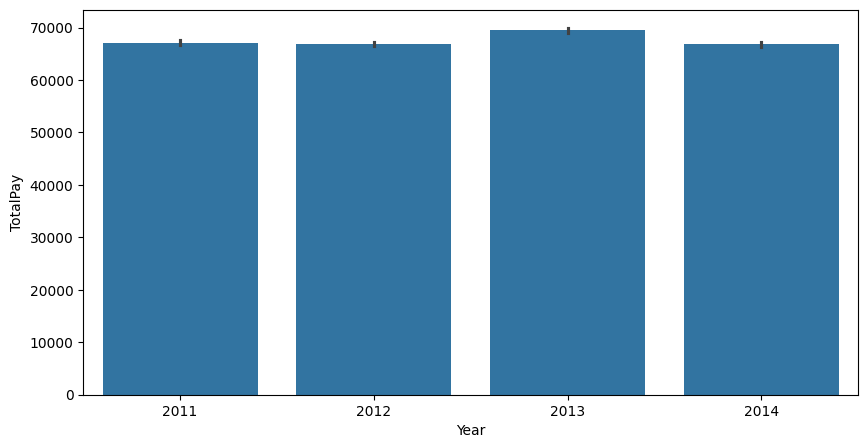

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='TotalPay',data=df_clean)
plt.show()

In [44]:
df.groupby('Year')['TotalPay'].mean()

,TotalPay
Year,
2011,71744.103871
2012,74135.429698
2013,78808.285041
2014,75471.836912


In [45]:
df_clean['Agency'].unique()

array(['San Francisco'], dtype=object)

only one agency

In [46]:
df_clean.drop_duplicates(inplace=True)

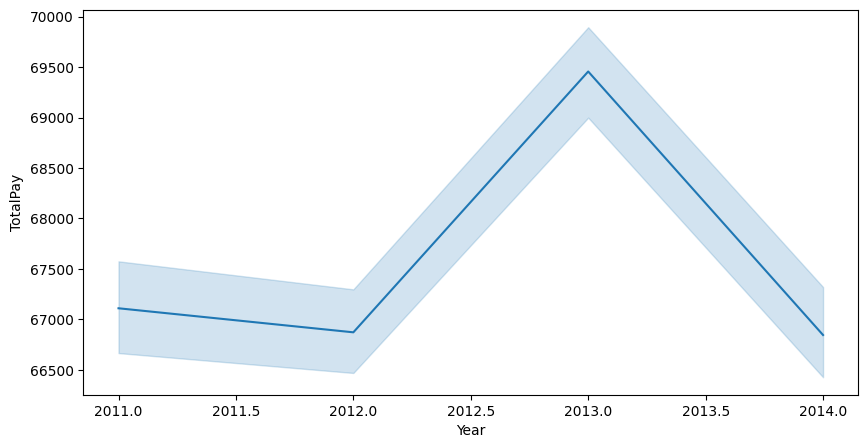

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='TotalPay',data=df_clean)
plt.show()


In [48]:
df_clean.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
979,980,EUGENE CLENDINEN,MANAGER VIII,161479.27,0.00,8750.10,0.0,170229.37,170229.37,2011,San Francisco
982,983,CHARLES MC COY,"LIEUTENANT, FIRE DEPARTMENT",123105.00,31227.51,15842.22,0.0,170174.73,170174.73,2011,San Francisco
983,984,MICHAEL HASTEY,FIRE FIGHTER PARAMEDIC,122405.00,32171.52,15551.55,0.0,170128.07,170128.07,2011,San Francisco
986,987,KENNETH LOMBARDI,"CAPTAIN, FIRE SUPPRESSION",135103.40,23598.47,11377.28,0.0,170079.15,170079.15,2011,San Francisco
988,989,DOUGLAS PRICE-HANSON,PHYSICIAN SPECIALIST,159511.95,0.00,10513.63,0.0,170025.58,170025.58,2011,San Francisco
989,990,SUSAN OBATA,SUPERVISING PHYSICIAN SPECIALIST,169941.65,0.00,0.00,0.0,169941.65,169941.65,2011,San Francisco
991,992,LOUIS ESPINDA,LIEUTENANT III (POLICE DEPARTMENT),149050.78,6220.38,14638.50,0.0,169909.66,169909.66,2011,San Francisco
993,994,GRACE SALUD,NURSE MANAGER,156312.00,0.00,13587.12,0.0,169899.12,169899.12,2011,San Francisco
995,996,ANTIONETTE GRIFFIN,CLINICAL NURSE SPECIALIST,169572.08,0.00,250.00,0.0,169822.08,169822.08,2011,San Francisco
996,997,KATHERINE MAH,CLINICAL NURSE SPECIALIST,169572.06,0.00,250.00,0.0,169822.06,169822.06,2011,San Francisco


###making machine learning model

##feature selctions

drop none value like name , agency because its only one value
drop id

In [49]:
df_clean.drop(['Id','Agency','EmployeeName'],axis=1,inplace=True)

<Axes: >

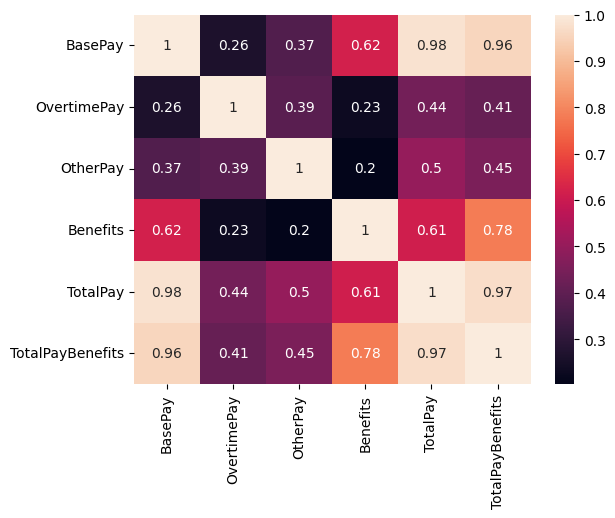

In [50]:
sns.heatmap(df_clean[ncols].corr(),annot=True)

drop totalpaywithbenfites

In [51]:
df_clean.drop('TotalPayBenefits',axis=1,inplace=True)

handling texts on job title

In [52]:
df_clean['JobTitle'] = df_clean['JobTitle'].str.lower()


In [53]:
#removing punctuwation
df_clean['JobTitle'] = df_clean['JobTitle'].str.replace(r'[^\w\s]', '', regex=True)


In [54]:
df_clean['JobTitle'] = df_clean['JobTitle'].str.strip()


In [55]:
df_clean['JobTitle'].nunique()

1564

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clean['JobTitle'] = label_encoder.fit_transform(df_clean['JobTitle'])

using linear regerssion model

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()

In [79]:
x=df_clean.drop(['BasePay'],axis=1)
y=df_clean['BasePay']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:
model.score(X_test,y_test)

0.528152207101956

evaluating model

In [82]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [83]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 690907306.4476235
R-squared: 0.528152207101956


In [72]:
df_clean.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year
979,834,161479.27,0.00,8750.10,0.0,170229.37,2011
982,786,123105.00,31227.51,15842.22,0.0,170174.73,2011
983,573,122405.00,32171.52,15551.55,0.0,170128.07,2011
986,220,135103.40,23598.47,11377.28,0.0,170079.15,2011
988,990,159511.95,0.00,10513.63,0.0,170025.58,2011


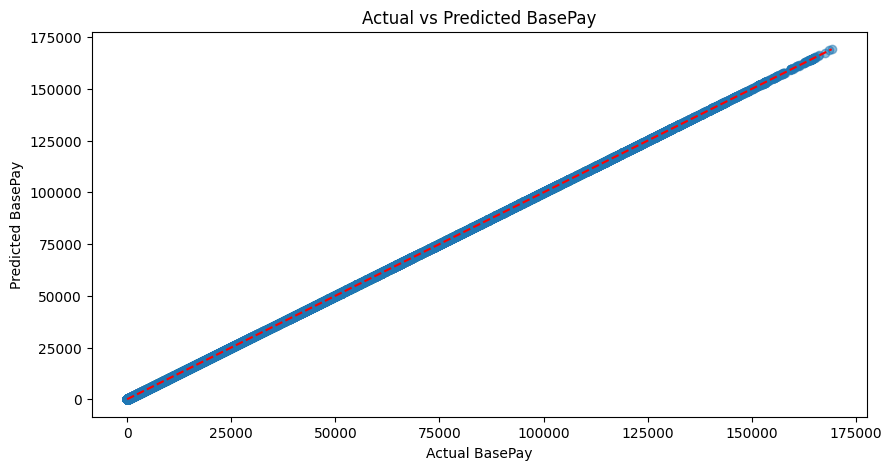

In [78]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual BasePay")
plt.ylabel("Predicted BasePay")
plt.title("Actual vs Predicted BasePay")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
